<a href="https://colab.research.google.com/github/Harshpandey22/CVIP-Data_Science/blob/main/CVIP_Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Harsh Pandey**

Phase 2 Project

Title: **Email Spam Detection**

# Data Preprocessing

Importing the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin1')

Reading the Dataset

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


Renaming the Required Columns and Dropping the Unwanted Columns

In [ ]:
df.rename(columns={'v1':'Email Category', 'v2':'Messages'}, inplace=True)
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , axis=1 , inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Email Category  5572 non-null   object
 1   Messages        5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,Email Category,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Checking for any Missing Values in any Columns

In [ ]:
df.isnull().any()

Email Category    False
Messages          False
dtype: bool

Shaping the Dataset

In [ ]:
df.shape

(5572, 2)

Performing the Categorical Encoding

In [ ]:
df.loc[df["Email Category"] == "spam", "Email Category"] = 0
df.loc[df["Email Category"] == "ham", "Email Category"] = 1

df.head()

,Email Category,Messages
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


Splitting the Dataset into Training and Testing Set

In [ ]:
X = df["Messages"]
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Messages, Length: 5572, dtype: object

In [ ]:
Y = df["Email Category"]
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Email Category, Length: 5572, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2 , random_state=0)

In [ ]:
X_train

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: Messages, Length: 4457, dtype: object

In [ ]:
Y_train

1114    1
3589    1
3095    1
1012    1
3320    1
       ..
4931    1
3264    0
1653    1
2607    1
2732    1
Name: Email Category, Length: 4457, dtype: object

Converting Text Messages into Numerical Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [ ]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [ ]:
print(X_train_features)

  (0, 2400)	0.42251087562056844
  (0, 6643)	0.310713090556495
  (0, 890)	0.4431414936624499
  (0, 3102)	0.4078732191722945
  (0, 3308)	0.4607061502580205
  (0, 3697)	0.38724260113041314
  (1, 4285)	0.3619488551509563
  (1, 3709)	0.49218179847458676
  (1, 7020)	0.3597932878999011
  (1, 3022)	0.2656832920063487
  (1, 6479)	0.46190436338926344
  (1, 2530)	0.46190436338926344
  (2, 3109)	0.15859116597265116
  (2, 4045)	0.15859116597265116
  (2, 777)	0.24853230530973786
  (2, 3267)	0.3059351024463395
  (2, 6904)	0.3323889186374277
  (2, 3867)	0.22778533625897432
  (2, 7140)	0.3323889186374277
  (2, 4836)	0.2640067957824946
  (2, 6113)	0.3323889186374277
  (2, 5497)	0.39905624733507106
  (2, 4344)	0.29741887579744203
  (2, 6985)	0.3059351024463395
  (3, 2642)	0.4893788451570101
  :	:
  (4454, 5637)	0.25666584238764617
  (4454, 1470)	0.30396107829387736
  (4454, 2095)	0.24269967159421676
  (4454, 7019)	0.2053843287832964
  (4454, 3827)	0.23135590834159414
  (4454, 1497)	0.23226820104119308
  

# Performing Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

predict = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, predict)

print(model.score(X_train_features, Y_train))
print('accuracy on the test data is : ', accuracy_on_training_data)

0.9699349338119811
accuracy on the test data is :  0.9699349338119811


# Testing the Model

In [ ]:
user_input_mail = input("Please enter the email content: ")
input_your_mail = [user_input_mail]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("\n It is Ham Mail")
else:
    print("\n !!It is Spam Mail!!")


Please enter the email content: I'm leaving my house now...

 It is Ham Mail


In [ ]:
user_input_mail = input("Please enter the email content: ")
input_your_mail = [user_input_mail]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("\n It is Ham Mail")
else:
    print("\n !!It is Spam Mail!!")

Please enter the email content: PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S.I.M. points. Call 08718738001 Identifier Code: 49557 Expires 26/11/04

 !!It is Spam Mail!!


# Visualization

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score,precision_score

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=800 , height=800 , min_font_size=10 , background_color='black')

In [ ]:
spam_wordcloud = wc.generate(df[df['Email Category'] == 1]['Messages'].str.cat(sep =" ")) # catination
ham_wordcloud = wc.generate(df[df['Email Category'] == 0]['Messages'].str.cat(sep =" "))

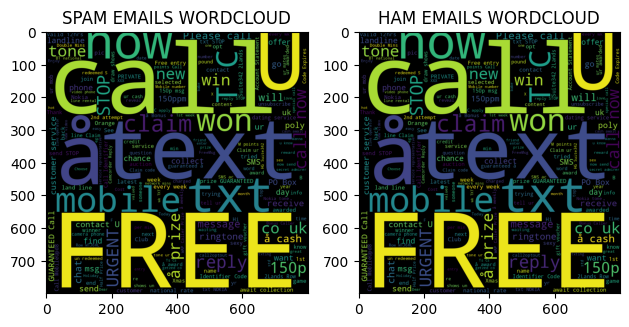

In [ ]:
plt.subplot(121)
plt.imshow(spam_wordcloud)
plt.title('SPAM EMAILS WORDCLOUD')
plt.subplot(122)
plt.imshow(ham_wordcloud)
plt.title('HAM EMAILS WORDCLOUD')
plt.tight_layout()
plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

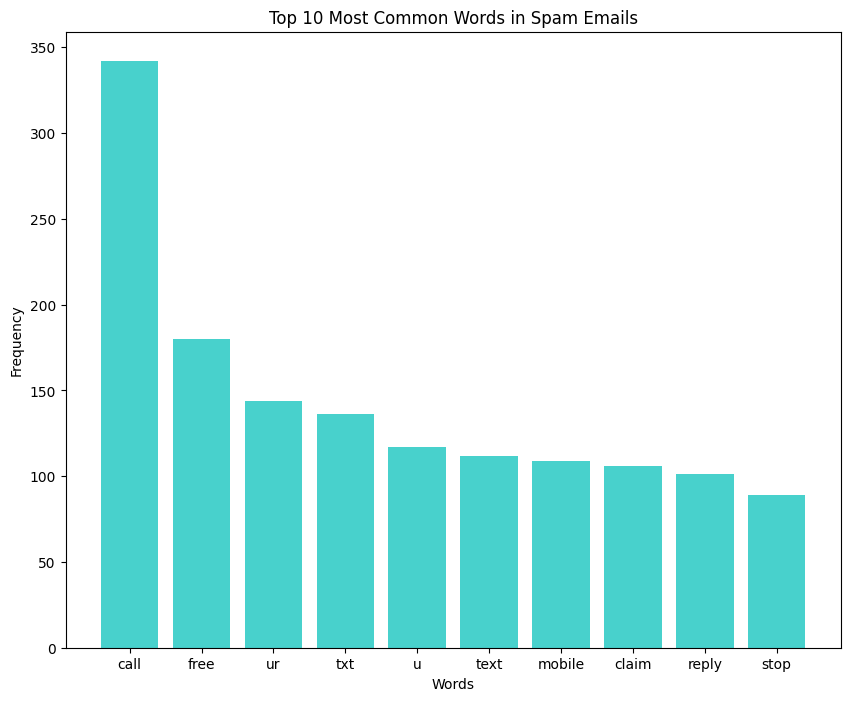

In [ ]:
from collections import Counter
stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Email Category'] == 0]['Messages']).split()
ham_words = " ".join(df[df['Email Category'] == 1]['Messages']).split()
spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])
plt.figure(figsize=(10, 8))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='MediumTurquoise')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.show()

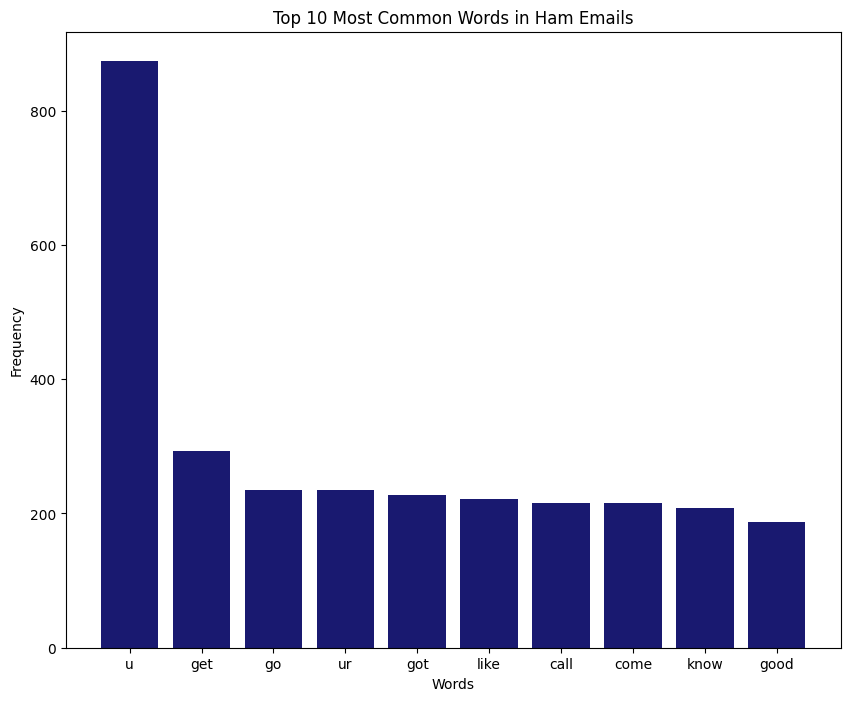

In [ ]:
ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])
plt.figure(figsize=(10, 8))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='MidnightBlue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.show()

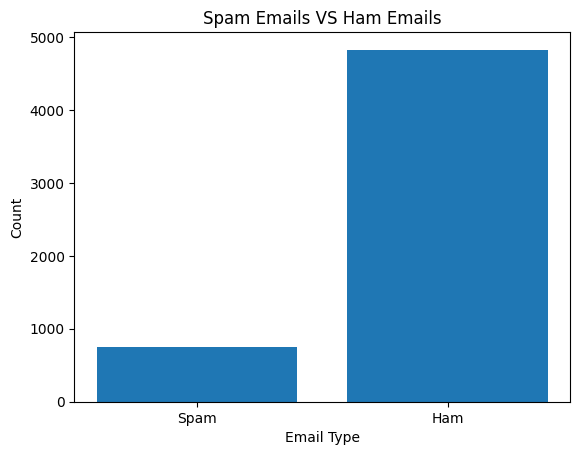

In [68]:
spam_count = df[df['Email Category'] == 0].shape[0]
ham_count = df[df['Email Category'] == 1].shape[0]
plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Spam Emails VS Ham Emails')
plt.show()

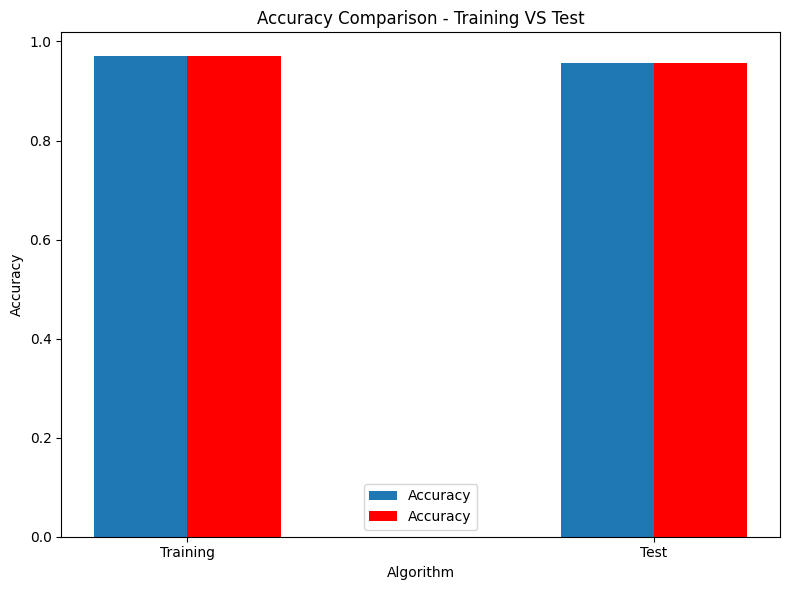

In [77]:
x = np.arange(2)
bar_width = 0.2
plt.figure(figsize=(8, 6))
plt.bar(x, [train_accuracy, test_accuracy], bar_width, label='Accuracy')
plt.bar(x + bar_width, [train_accuracy, test_accuracy], bar_width, color='red', label='Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison - Training VS Test')
plt.xticks(x + bar_width / 2, ['Training', 'Test'])
plt.legend()
plt.tight_layout()
plt.show()